# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your section lead.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [2]:
df = pd.read_csv('data/mypersonality.csv')
# df = pd.read_csv('data/mypersonality_noprofanity.csv') # comment out above & uncomment this to use mypersonality_noprofanity.csv
df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

#### Create a new column called `status_length` that contains the length of each status:

In [3]:
# Print status_length
df['status_length'] = df['STATUS'].apply(lambda x: len(x))
df['status_length']

0        27
1        63
2       121
3        42
4        11
       ... 
9911     28
9912     27
9913     31
9914     21
9915    179
Name: status_length, Length: 9916, dtype: int64

#### Create a new column called `status_word_count` that contains the number of words in each status:

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [4]:
# Print status_word_count
df['status_word_count'] = df['STATUS'].apply(lambda x: len(x.split()))
df['status_word_count']

0        5
1       13
2       26
3        9
4        3
        ..
9911     5
9912     5
9913     6
9914     4
9915    32
Name: status_word_count, Length: 9916, dtype: int64

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

#### Show the five longest and five shortest statuses based off of `status_word_count`:

In [5]:
#Print five longest statuses
df['status_word_count'].sort_values(ascending=False).head()

496     89
6989    85
5208    84
7976    83
5680    83
Name: status_word_count, dtype: int64

In [6]:
#Print five shortest statuses
df['status_word_count'].sort_values().head()

8178    1
4170    1
2016    1
956     1
4177    1
Name: status_word_count, dtype: int64

A status post can be as long as 89 words and as short as 1 word

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

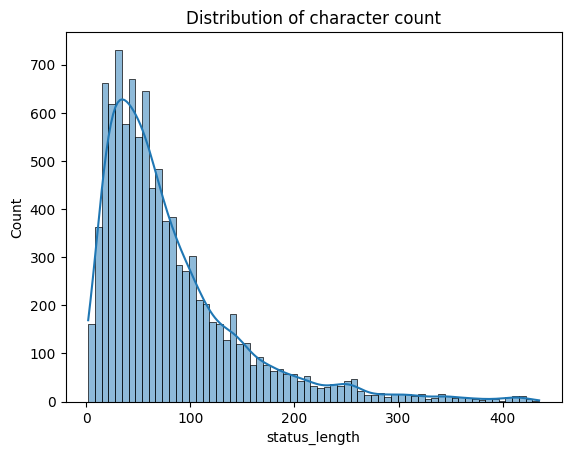

In [7]:
# Plot distribution of character count
sns.histplot(data=df, x ='status_length', kde=True)
plt.title('Distribution of character count');

Most posts have less than 100 characters. I guess typing is hard!

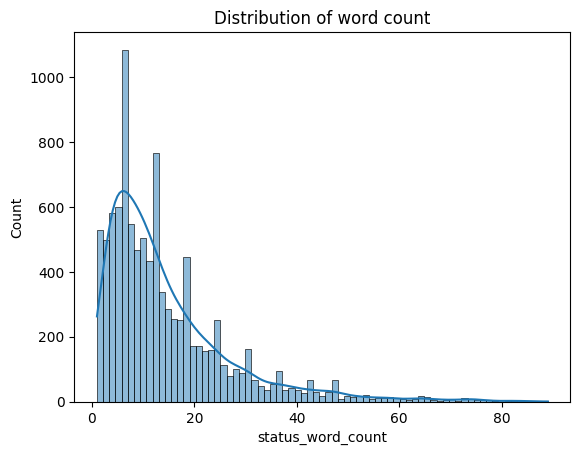

In [8]:
# Plot distribution of word count
sns.histplot(data=df, x ='status_word_count', kde=True)
plt.title('Distribution of word count');

In [9]:
# Print value counts for status word count
df['status_word_count'].value_counts()

status_word_count
5     600
4     580
6     559
8     548
7     525
     ... 
89      1
79      1
84      1
85      1
71      1
Name: count, Length: 85, dtype: int64

Most posts have less than 20 words. In fact the posts per word count climbs up to a mode of 5 words and then starts to gradually drop off. People definitely prefer shorter to long posts.

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

-0.23228167444788148

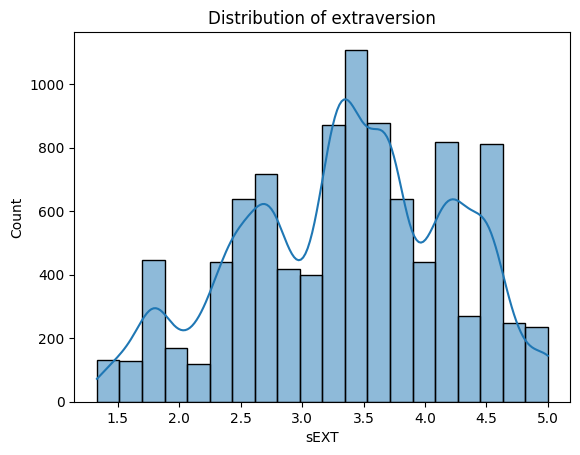

In [10]:
# Plot distribution of extraversion
sns.histplot(data=df, x='sEXT', bins=20, kde=True)
plt.title('Distribution of extraversion');
display(df['sEXT'].skew())

There is some negative skew and more of the values are clustered around the right-tail of the distribution. I actually expect this due to the Lake Wobegon, where people will overestimate positive attributes of themselves. You just can't trust people to be objective these days.

0.4245151945517603

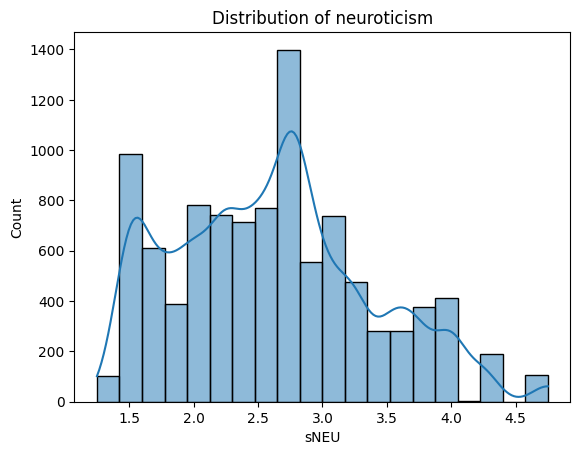

In [11]:
# Plot distribution of neuroticism
sns.histplot(data=df, x ='sNEU', bins=20, kde=True);
plt.title('Distribution of neuroticism');
display(df['sNEU'].skew())

The opposite for a negative trait has happened. There is some positive skew and more of the values are clustered around the left-tail of the distribution. Is it really so surprising that people will underestimate negative attributes of themselves?

-0.12476859575536053

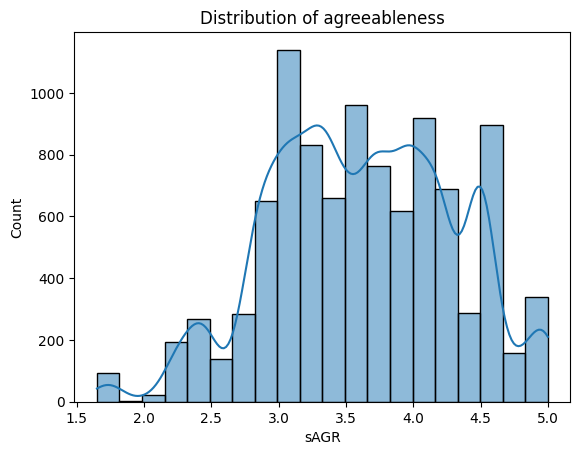

In [12]:
# Plot distribution of agreeableness
sns.histplot(data=df, x ='sAGR', bins=20, kde=True)
plt.title('Distribution of agreeableness');
display(df['sAGR'].skew())

Similarly to extraversion, there is some negative skew for agreeableness

-0.0885741344862301

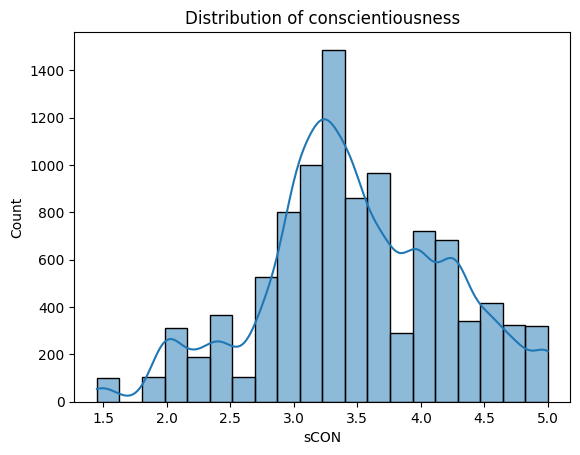

In [13]:
# Plot distribution of conscientiousness
sns.histplot(data=df, x ='sCON', bins=20, kde=True)
plt.title('Distribution of conscientiousness');
display(df['sCON'].skew())

Similarly to extraversion and agreeableness, there is some negative skew for conscientiousness

-1.0492158111551968

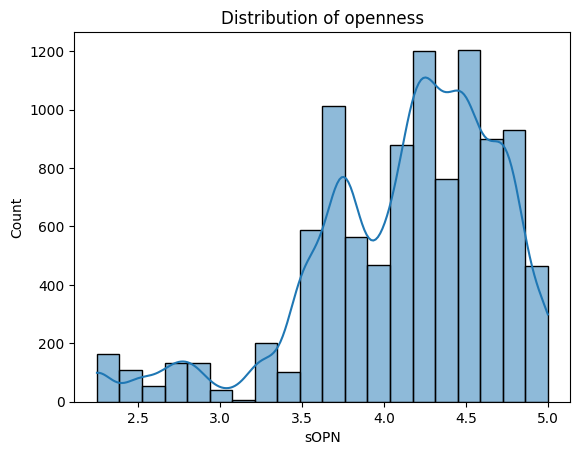

In [14]:
# Plot distribution of openness
sns.histplot(data=df, x ='sOPN', bins=20, kde=True)
plt.title('Distribution of openness');
display(df['sOPN'].skew())

Similarly to extraversion, agreeableness and conscientiousness, there is some negative skew for openness. What is really interesting is that the negative skew is more pronounced compared to the other measures. This would indicate that people are more likely to rate themselves as more open than they really are compared to the other Ocean personality traits

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [15]:
# Print number of unique users
df['#AUTHID'].nunique()

250

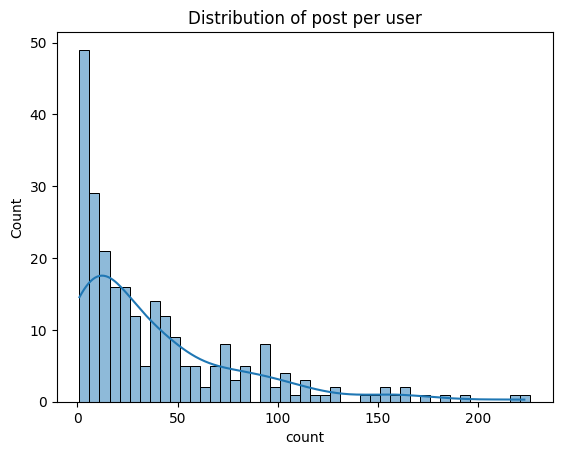

In [16]:
# Plot distribution of post per user
sns.histplot(x=df['#AUTHID'].value_counts(), binwidth=5, kde=True)
plt.title('Distribution of post per user');

There are a small number of users who are responsible for a disproportionately high number of posts. We can see from the histogram that most people post less than 5 posts, followed by 10 posts with the number decreasing as number of posts increases (based on my bin widths of 5).

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [17]:
# Create new dataframe with required columns
unique_users = df.copy()
unique_users = unique_users.drop_duplicates(subset='#AUTHID')
unique_users.drop(labels=['STATUS', 'DATE', 'status_length', 'status_word_count'], axis=1, inplace=True)
unique_users

,#AUTHID,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y
102,318bf822d4f2bd3920367560218619c0,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n
171,ecbddbfe00e0f83cfdb802a7186061c7,4.30,2.15,3.60,3.30,4.10,y,n,y,n,y
236,db39f7b2aad360b1033ec1f8fcd57f9c,4.65,3.20,3.05,3.65,4.75,y,y,n,y,y
246,4d035bd3fd8d9595d15cea9e388964be,3.70,2.90,3.40,3.35,4.05,y,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...,...
9909,a764ca41dca158d7a191505dcc8ce47f,3.70,2.50,4.20,4.10,3.60,y,n,y,y,n
9910,deb899e426c1a5c66c24eeb0d7df6257,2.15,2.15,4.10,2.90,4.60,n,n,y,n,y
9912,ea28a927cb6663480ea33ca917c3c8ba,4.05,3.35,3.80,3.95,4.50,y,y,y,y,y
9914,5532642937eb3497a43e15dbb23a9d2d,1.40,4.05,3.30,3.40,3.95,n,y,n,n,y


#### Plot the distribution of personality scores for `unique_users`:

Do the distributions look different? Here, each individual user will only be represented once.

-0.10336186089957537

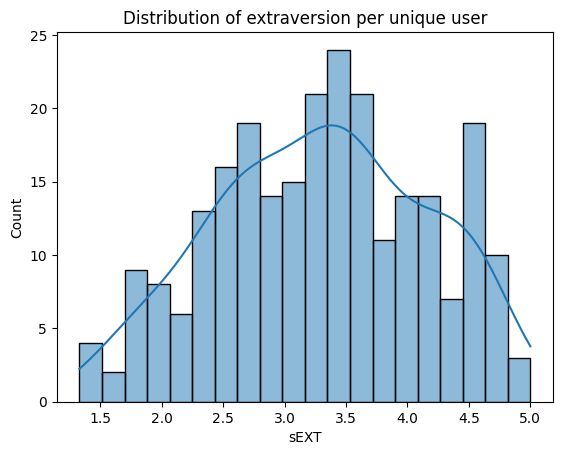

In [18]:
# Plot distribution of extraversion per unique user
sns.histplot(data=unique_users, x ='sEXT', bins=20, kde=True)
plt.title('Distribution of extraversion per unique user');
display(unique_users['sEXT'].skew())

The skew has decreased in magnitude from -0.23228 to -0.10336. Note that to visually inspect the before and after histograms, I have set all the bins to be equal to 20 instead of using the seaborn default. It would seem that previously, for all statuses, the users who scored themselves higher on extraversion were inflating the score by posting more. Once we have accounted for only unique users, we see that the clustering of extraversion values has shifted slightly away from the right tail.

0.41120931459059923

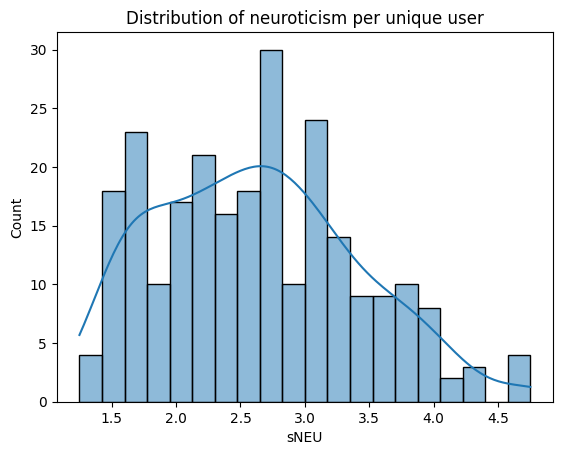

In [19]:
# Plot distribution of neuroticism per unique user
sns.histplot(data=unique_users, x ='sNEU', bins=20, kde=True)
plt.title('Distribution of neuroticism per unique user');
display(unique_users['sNEU'].skew())

There is barely any change in the skew before and after, from 0.42451 to 0.41120. I can't really speculate on any reason, other than stating aspects about the distribution such as the skew and kurtosis.

-0.2853115673691079

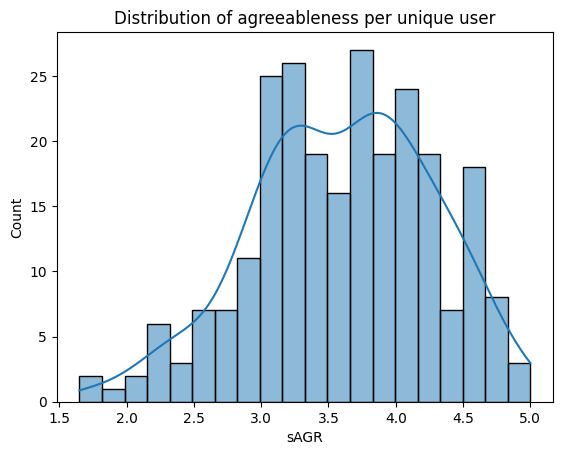

In [20]:
# Plot distribution of agreeableness per unique user
sns.histplot(data=unique_users, x ='sAGR', bins=20, kde=True)
plt.title('Distribution of agreeableness per unique user');
display(unique_users['sAGR'].skew())

The negative skew has increased in magnitude from -0.12476 to -0.28531. This would indicate that the distribution of the agreeableness are more clustered to the right for unique users. Why were the scores more clustered to the lower (left) end when looking at all the statuses? My hypothesis is that the less agreeable persons were posting more often! Perhaps, they are more likely to post because they need to 'fight' with people online.

-0.16684472531872113

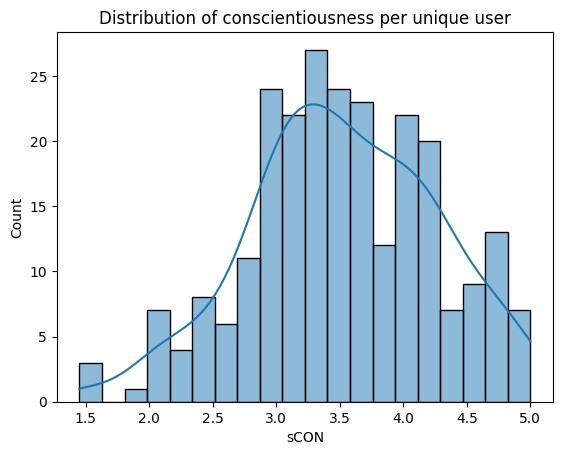

In [21]:
# Plot distribution of conscientiousness per unique user
sns.histplot(data=unique_users, x ='sCON', bins=20, kde=True)
plt.title('Distribution of conscientiousness per unique user');
display(unique_users['sCON'].skew())

The negative skew has increased in magnitude from -0.08857 to -0.16684. I'm not really sure this is of any significance. I would expect conscientious people to post more lengthy posts as opposed to posting more times. For example, they may not post just a 'yes' or 'no' but would be quite deliberate and detailed. This would mean that when looking at all statuses, there were more posts by less conscientious users, hah perhaps we should also check for grammatical and spelling errors. Do we expect conscientious people to be so careless and make such mistakes?

-0.7848999667695252

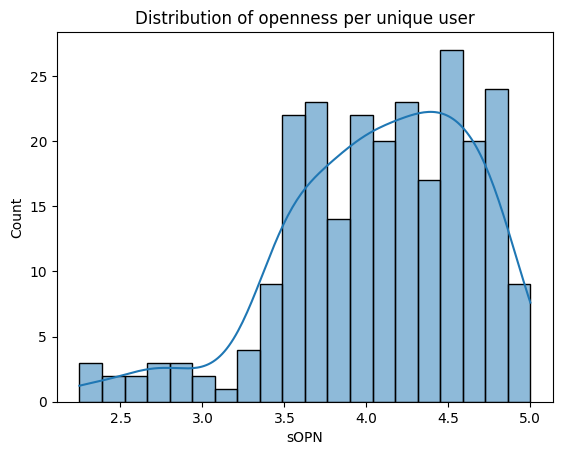

In [22]:
# Plot distribution of openness per unique user
sns.histplot(data=unique_users, x ='sOPN', bins=20, kde=True);
plt.title('Distribution of openness per unique user');
display(unique_users['sOPN'].skew())

The negative skew has decreased in magnitude from -1.0492 to -0.78489. This would indicate that the users who rate themselves as more open were the ones responsible for posting more statuses, in a sense inflating the score for openness. I would expect this to be true since more open people would likely be more comfortable with sharing their thoughts on the internet to strangers.

#### Use the `.describe()` method on `unique_users`:

In [23]:
# Create the output as required by the question
unique_users.describe()

,sEXT,sNEU,sAGR,sCON,sOPN
count,250.000000,250.000000,250.000000,250.000000,250.00000
mean,3.292120,2.627240,3.600320,3.522920,4.07856
std,0.861368,0.776835,0.670758,0.740211,0.57506
min,1.330000,1.250000,1.650000,1.450000,2.25000
25%,2.662500,2.000000,3.150000,3.000000,3.75000
50%,3.300000,2.590000,3.660000,3.500000,4.15000
75%,4.000000,3.150000,4.100000,4.050000,4.50000
max,5.000000,4.750000,5.000000,5.000000,5.00000


#### Note

I noticed some very interesting things about the mean, min and max of the values of the different personality traits, especially when considering that 4 of them have a positive-sounding meaning and only one (neuroticism) has a negative-sounding meaning. I believe there is some sort of self-serving bias and will explore this under the 'Choose your own adventure' section.

### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

### Answer 

Presenting a distribution visually displays how data points are spread across values and helps understand data spread, patterns, relationships, and shape. It's effective for identifying trends, clusters, and outliers, and communicates insights to non-technical audiences.

A table of summary statistics presents key numerical values describing central tendency and variability. Useful for quick overviews, comparing datasets, ensuring numerical precision, and structured data reporting in research or presentations.

The choice depends on data nature, goals, and audience. Combining both methods often provides a comprehensive presentation of data analysis results. Here are the comparisons between the 2 types:


**Presenting a Distribution:**

A distribution provides a visual representation of how data points are spread out across different values and is useful when:

**Understanding Data Spread:** If we want to see the overall pattern and variability of the data and get a clear picture of how the values are distributed; is especially helpful for identifying trends, clusters, outliers, and potential data skewness.

**Exploring Patterns and Relationships:** Distributions are useful for observing patterns or relationships between variables; an example would be the comparison between distributions of two or more variables to see if there are differences or similarities.

**Visualizing Shape:** A distribution can help with the understanding of the shape of the data, such as whether it follows a normal (bell-shaped) distribution, is skewed, or has multiple peaks.

**Communicating Insights:** Visualizations of distributions are often easier for non-technical audiences to understand and can help communicate key insights more effectively.

**Presenting a Table of Summary Statistics:**

A table of summary statistics provides a concise and organized way of presenting key numerical values that describe the central tendency, variability, and other characteristics of a dataset and is useful when:

**Quick Overview:** If you need a quick overview of the dataset without the need for detailed visual interpretation, a summary table provides the necessary information at a glance.

**Comparison and Reference:** When you want to compare multiple datasets or variables, a table makes it easy to see differences and similarities in their statistical properties.

**Numerical Precision:** Summary statistics provide precise numerical values, which can be important when making quantitative comparisons or calculations.

**Data Reporting:** Tables of summary statistics are often used in research papers, reports, or presentations as a structured way to present key findings and may be preferable to more technically sophisticated audiences.

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

#### Barcharts

Summary provided at the end of the 5 barcharts.

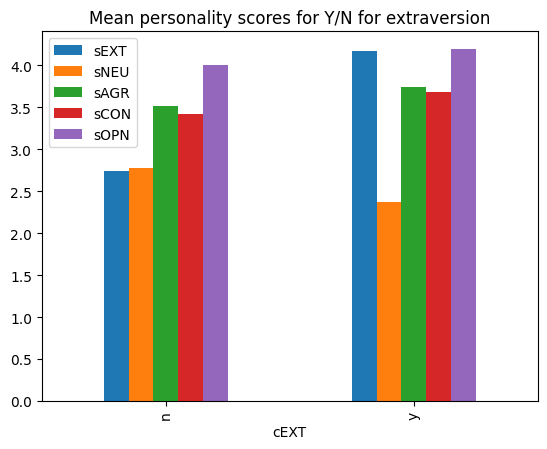

In [24]:
# Plot mean personality scores for Y/N for extraversion
unique_users.groupby('cEXT')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].mean().plot(kind='bar')
plt.title('Mean personality scores for Y/N for extraversion');

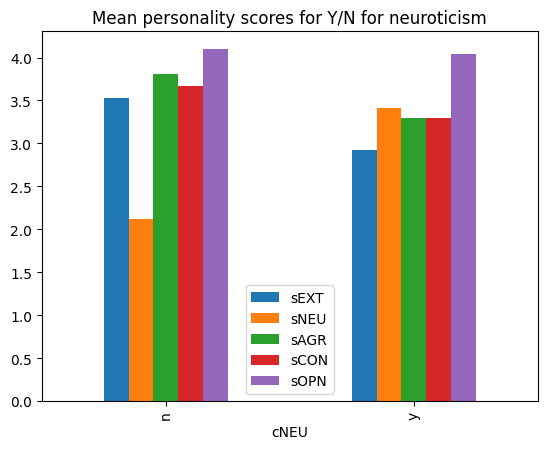

In [25]:
# Plot mean personality scores for Y/N for neuroticism
unique_users.groupby('cNEU')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].mean().plot(kind='bar')
plt.title('Mean personality scores for Y/N for neuroticism');

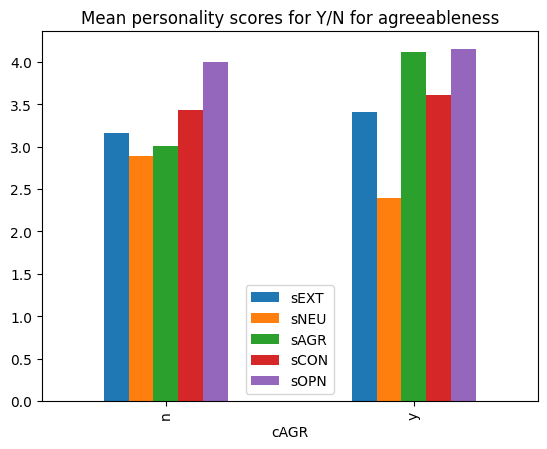

In [26]:
# Plot mean personality scores for Y/N for agreeableness
unique_users.groupby('cAGR')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].mean().plot(kind='bar')
plt.title('Mean personality scores for Y/N for agreeableness');

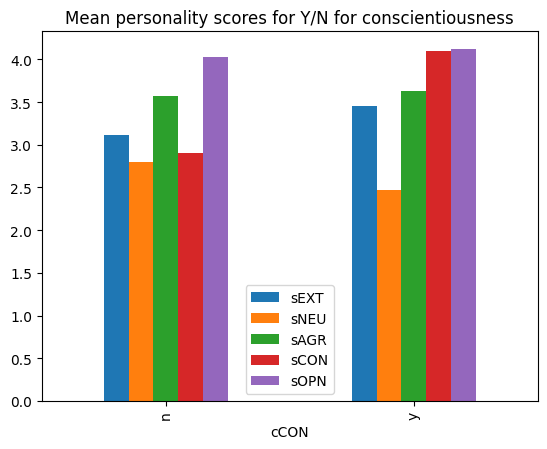

In [27]:
# Plot mean personality scores for Y/N for conscientiousness
unique_users.groupby('cCON')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].mean().plot(kind='bar')
plt.title('Mean personality scores for Y/N for conscientiousness');

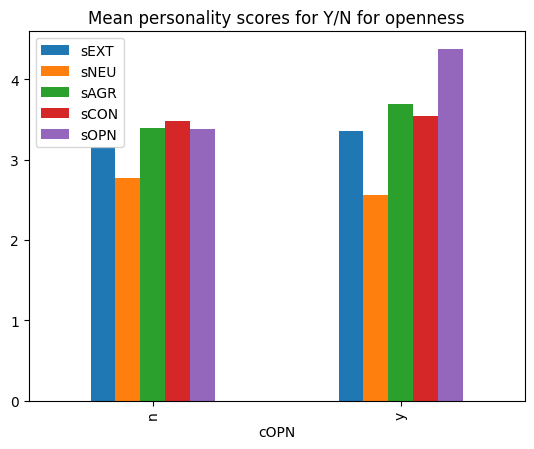

In [28]:
# Plot mean personality scores for Y/N for openness
unique_users.groupby('cOPN')[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].mean().plot(kind='bar')
plt.title('Mean personality scores for Y/N for openness');

Note that the binary classification into Y and N classes is based on the median of the personality scores. 

The first thing I noticed is that the for the 4 more positive sounding traits, the Y classification is always higher (above 4) than compared to the single negaitve sounding trait (neuroticism), where the Y classification has a score of less than 3.5. Similarly, when comparing the N classification of the 4 positive sounding traits with the single negative sounding trait, the N scores are all higher (more than 2.5 as compared to around 2.0). Earlier, I brought up the Lake Wobegon effect and this effect seems to be manifested in this sample of 250 individuals.

I also notice that the persons who are are classified as Y on any of the 4 positive sounding traits all have neuroticism as their lowest scoring trait. Interestingly, this is also almost true for those classified as N on any of the 4 positive sounding traits. The only exception is for those classified as N on extraversion, their extraversion score is slightly lower than their neuroticism score. For all the 4 positive sounding traits, those classified as Y always have a lower neurotcism score than those classified as N for that particular trait.

Now, if we examine just the Y and N for neuroticism, we see that individuals classified as Y score highest in openness (hmm.. very interesting), but the reverse is not true, and that individuals classified as Y for openness, score themselves very low in neuroticism. This would indicate that the neurotic individuals consider themselves to be more open (compared to the other traits) while the open individuals consider themselves to be less neurotic (compared to the other traits). The latter makes sense, but the former doesn't. 

Also I notice that between the Y and N classification, the total height of the bars (although hard to determine precisely) does not seem to be significantly different between the 2 classes. It does seem like people tend to overrate themselves for 'good' traits and then underrate themselves for 'bad' traits, again a manifestation of the Lake Wobegon effect.

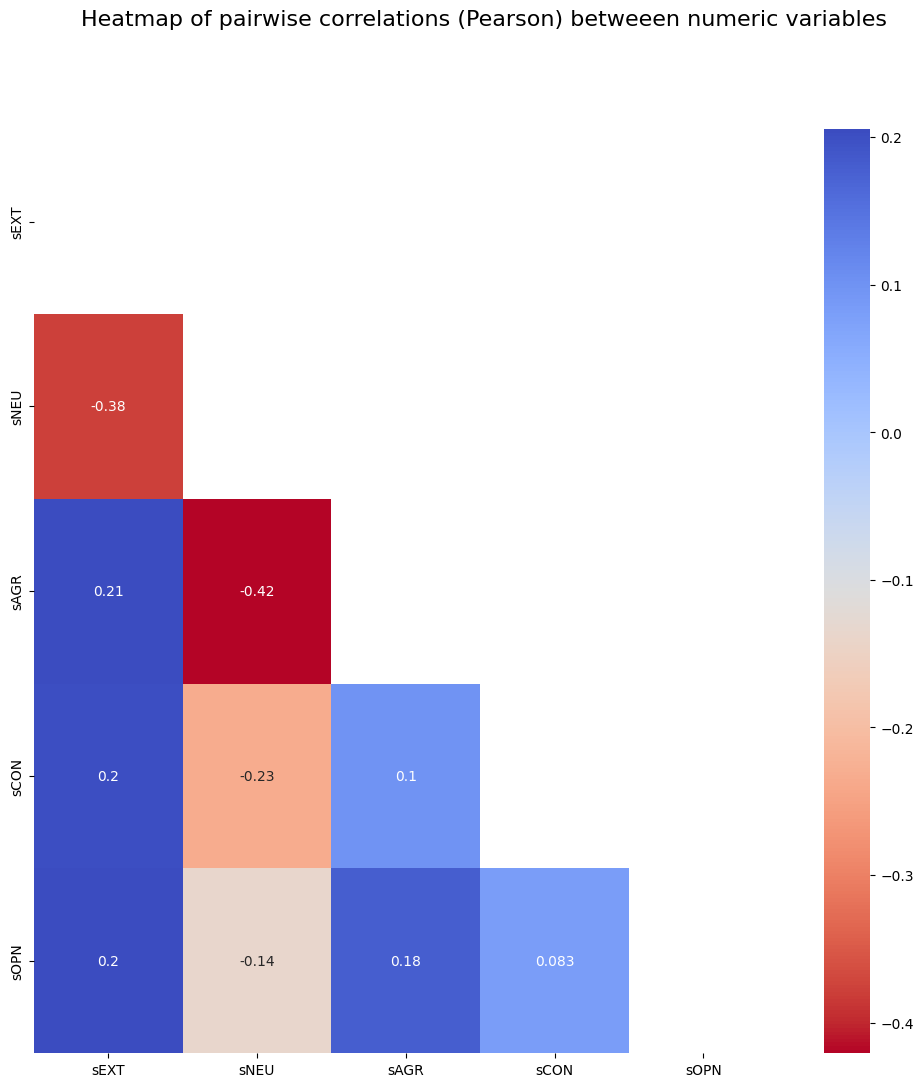

In [29]:
#Create a correlation heatmap of all numeric values
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(unique_users.corr(numeric_only=True)))
sns.heatmap(unique_users.corr(numeric_only=True), annot=True, cmap='coolwarm_r', mask=mask)
plt.suptitle('Heatmap of pairwise correlations (Pearson) betweeen numeric variables', fontsize=16);

The negatively correlated values have higher magnitudes than the positively correlated ones and we see this for neuroticism and extraversion (-0.38) and for neuroticism and agreeableness (-0.42). In fact only neuroticism is negatively correlated with all the other 4 traits, while the other 4 traits all have some degree of positive correlation with each other. No one wants to self identify as neurotic!

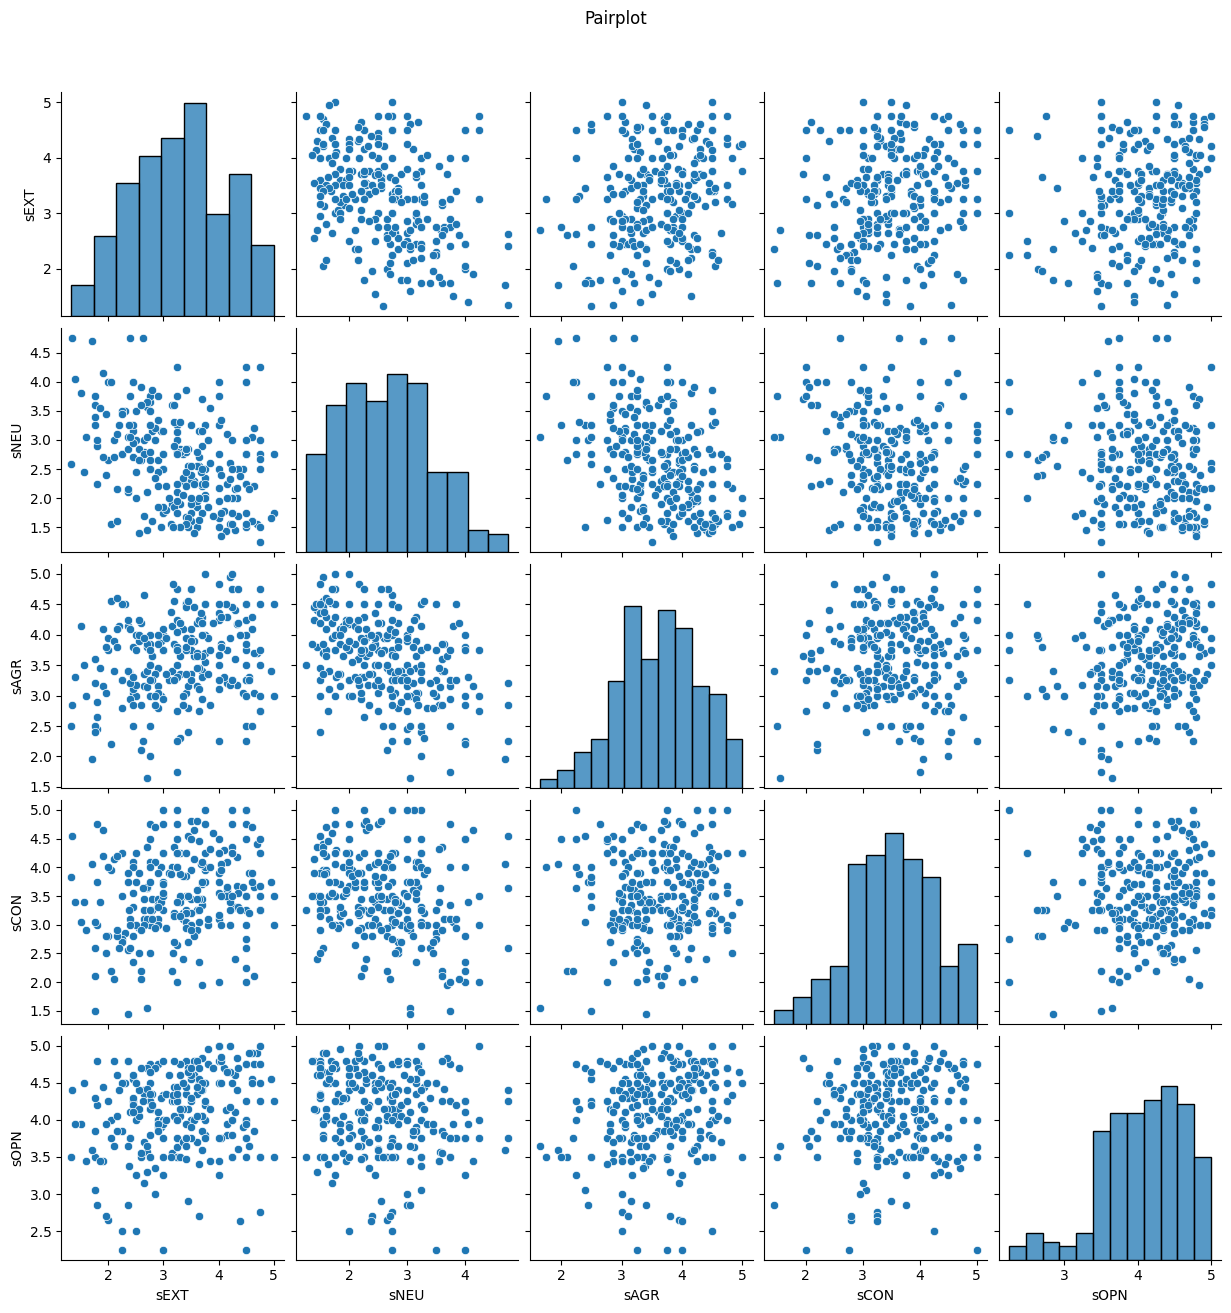

In [30]:
# Create pairplot of all numeric values
sns.pairplot(data=unique_users)
plt.suptitle('Pairplot', y=1.05);

Since I have already described the histograms, I will not do so again. I'll do an analysis of the scatterplots.

When we look at the scatterplots of the traits against each other, we see something that plays out across all of them, and in fact this is reflected in the correlation values. In all 4 of the positive traits, we see clustering towards the upper right. This means that individuals were more likely to score themselves highly for both traits. In other words, a person who rates themselves as more extraverted, would also rate themselves as more agreeable, more open and more conscientious. When we then compare these 4 positive traits to neuroticism, we see the opposite happening, individuals who rate themselves as highly extraverted have a tendency to rate themselves lowly on neuroticism, and this plays out for the remaining positive traits. This is the visual effect of the positive correlation of the 4 positive traits with each other.

If we were to just look at neuroticism and compare to the other 4 traits, we of course see the same thing, but with the clustering being 'mirrored' because of the negative correlation of neuroticism with the other traits. Persons who score themselves lowly on neuroticism score themselves highly on the other 4 traits, while persons who score themselves highly on neuroticism score themselves lowly on the other 4 traits.

---

## Exploring status length and word count based on personality

#### Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.

You'll need to use `groupby()` five separate times for this.

### Note
Analysis provided at the end of the 5 barplots.

In [31]:
# Display the mean for status length and status word count for Y/N for extraversion
df.groupby('cEXT')[['status_length', 'status_word_count']].mean()

,status_length,status_word_count
cEXT,,
n,79.866655,14.394428
y,81.704918,14.702305


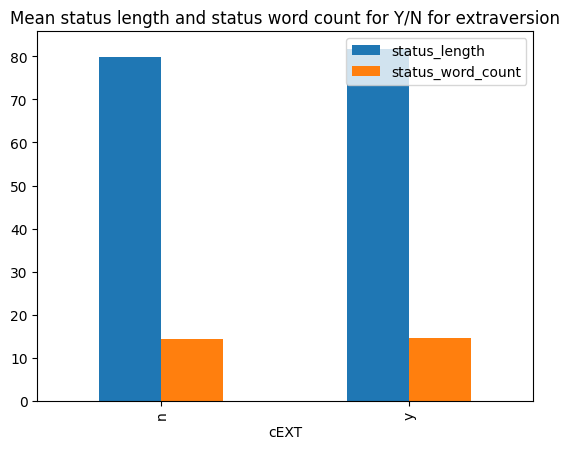

In [32]:
# Plot mean status length and status word count for Y/N for extraversion
df.groupby('cEXT')[['status_length', 'status_word_count']].mean().plot(kind='bar')
plt.title('Mean status length and status word count for Y/N for extraversion');

In [33]:
# Display the mean for status length and status word count for Y/N for neuroticism
df.groupby('cNEU')[['status_length', 'status_word_count']].mean()

,status_length,status_word_count
cNEU,,
n,80.852396,14.548314
y,80.304278,14.486414


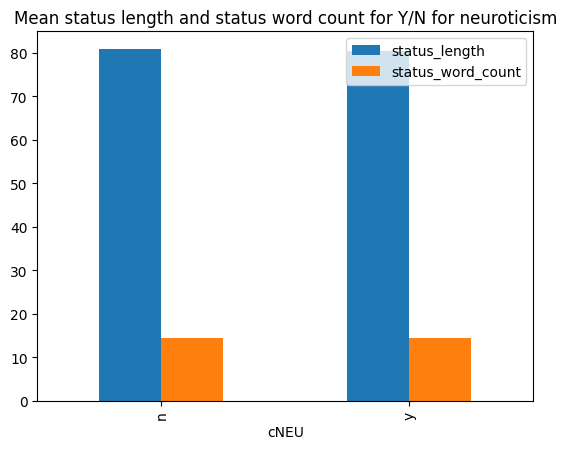

In [34]:
# Plot mean status length and status word count for Y/N for neuroticism
df.groupby('cNEU')[['status_length', 'status_word_count']].mean().plot(kind='bar')
plt.title('Mean status length and status word count for Y/N for neuroticism');

In [35]:
# Display the mean for status length and status word count for Y/N for agreeableness
df.groupby('cAGR')[['status_length', 'status_word_count']].mean()

,status_length,status_word_count
cAGR,,
n,80.976769,14.616692
y,80.355800,14.444276


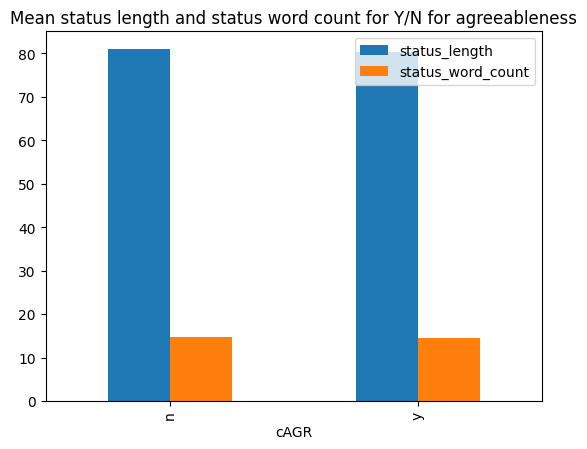

In [36]:
# Plot mean status length and status word count for Y/N for agreeableness
df.groupby('cAGR')[['status_length', 'status_word_count']].mean().plot(kind='bar')
plt.title('Mean status length and status word count for Y/N for agreeableness');

In [37]:
# Display the mean for status length and status word count for Y/N for conscientiousness
df.groupby('cCON')[['status_length', 'status_word_count']].mean()

,status_length,status_word_count
cCON,,
n,81.920149,14.709515
y,79.149034,14.308165


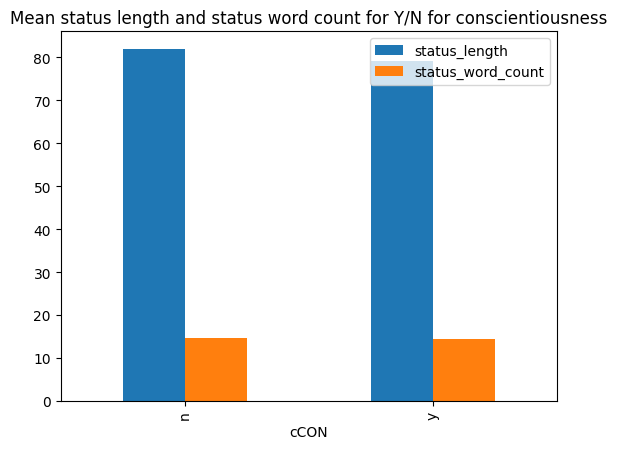

In [38]:
# Plot mean status length and status word count for Y/N for conscientiousness
df.groupby('cCON')[['status_length', 'status_word_count']].mean().plot(kind='bar')
plt.title('Mean status length and status word count for Y/N for conscientiousness');

In [39]:
# Display the mean for status length and status word count for Y/N for openness
df.groupby('cOPN')[['status_length', 'status_word_count']].mean()

,status_length,status_word_count
cOPN,,
n,85.686298,15.450726
y,78.905143,14.205184


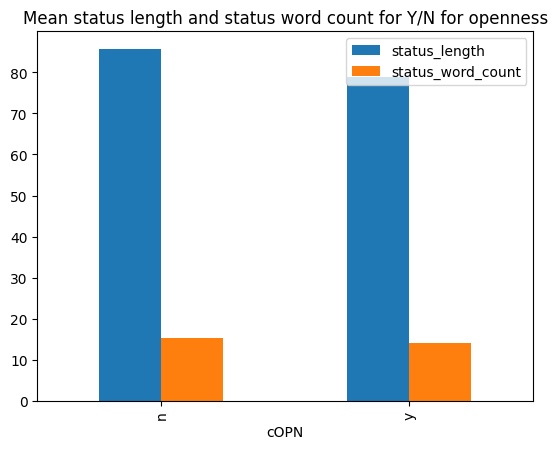

In [40]:
# Plot mean status length and status word count for Y/N for openness
df.groupby('cOPN')[['status_length', 'status_word_count']].mean().plot(kind='bar')
plt.title('Mean status length and status word count for Y/N for openness');

I notice that the mean values are very similar for all 5 personality traits, with values of around 80 and 15 for the mean for both status length and status word count respectively. This would indicate that the mean word count is around 15 and the mean character count is around 80 with little difference between traits and between the Y and N classes for each trait.

The biggest difference between classes would be for openness, where those classified as 'open' used on average, 1.25 words and nearly 7 characters less than those classified as 'not open'. This would suggest that openness has the greatest effect on post length by word and character count.

#### Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:

### Note
Analysis provided at the end of the 5 displots.

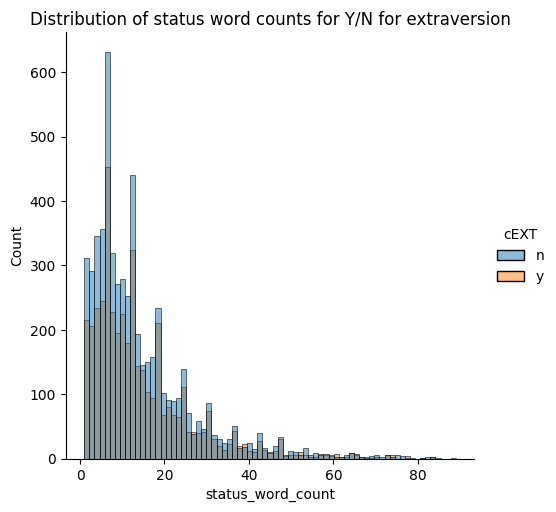

In [41]:
# Plot distribution of status word counts for Y/N for extraversion
sns.displot(data=df, x='status_word_count', hue='cEXT', kind='hist')
plt.title('Distribution of status word counts for Y/N for extraversion');

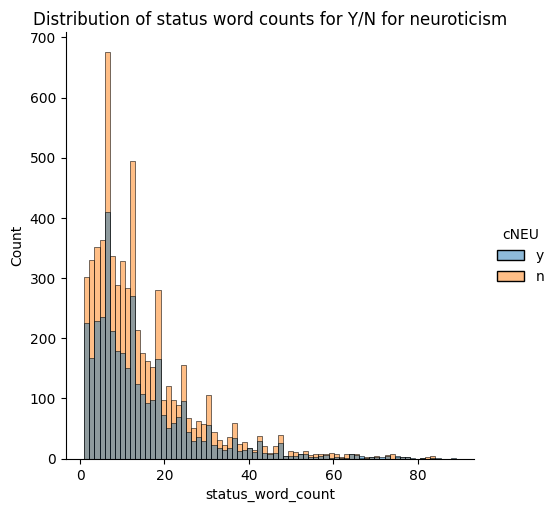

In [42]:
# Plot distribution of status word counts for Y/N for neuroticism
sns.displot(data=df, x='status_word_count', hue='cNEU', kind='hist')
plt.title('Distribution of status word counts for Y/N for neuroticism');

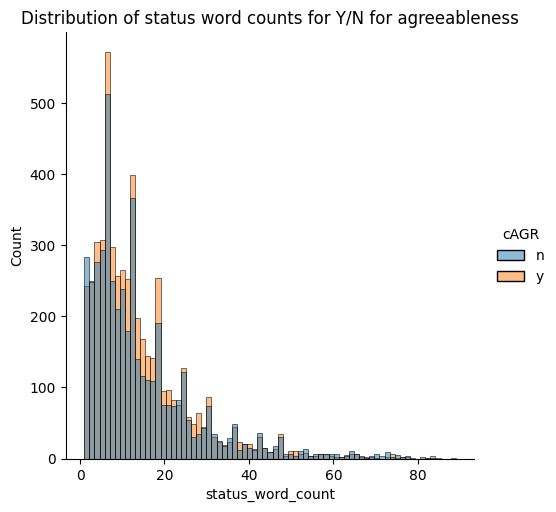

In [43]:
# Plot distribution of status word counts for Y/N for agreeableness
sns.displot(data=df, x='status_word_count', hue='cAGR', kind='hist')
plt.title('Distribution of status word counts for Y/N for agreeableness');

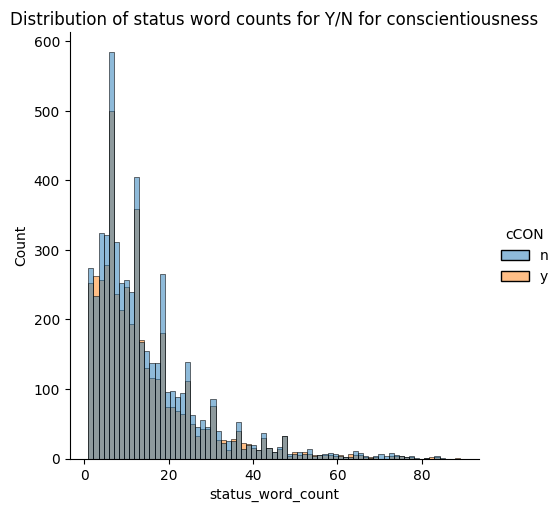

In [44]:
# Plot distribution of status word counts for Y/N for conscientiousness
sns.displot(data=df, x='status_word_count', hue='cCON', kind='hist')
plt.title('Distribution of status word counts for Y/N for conscientiousness');

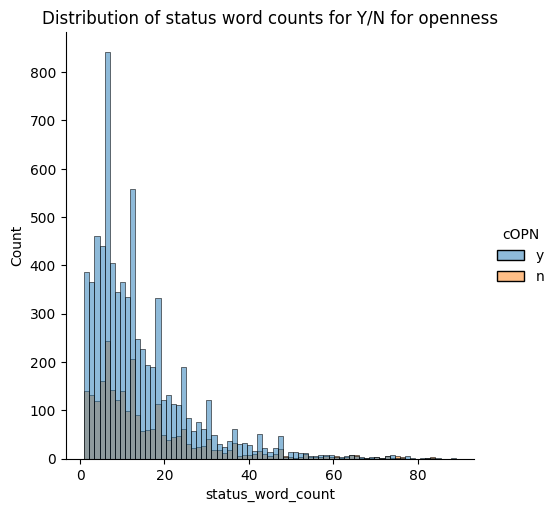

In [45]:
# Plot distribution of status word counts for Y/N for openness
sns.displot(data=df, x='status_word_count', hue='cOPN', kind='hist')
plt.title('Distribution of status word counts for Y/N for openness');

Comparing between the 5 traits for status word counts, I notice a few things.

There are 2 types of visual groupings, depending on the height of the bars for the Y and N classes. Agreeableness and openness have taller Y bars than N bars. The difference is less pronounced in agreeableness and very pronounced in openness. In fact based on the difference in the height of the bars and knowing that we used the completed dataframe, where each unique user can post many times, we can infer that those classified as 'open' were responsible for the majority of status posts, whereas this is split more evenly for Y and N classes of agreeableness. Hence we can make a conclusion that openness is positively correlated to number of status posts.

Now when looking at the second visual grouping, where the N bars are taller than the Y bars, we have extraversion, neuroticism and conscientiousness. The difference is the least pronounced in conscientiousness and more pronounced in extraversion and neuroticism, with neuroticism seeming to have the most difference. Why are those who are classified as N for extraversion posting more statuses than those classified as Y for extraversion? Could it be that the more extraverted persons spend less time on social media and spend more time interacting face to face? This might be possible, but hard to verify, because we could also make the argument that more extraverted persons would be the ones spending more time on social media updating their friends and followers. 

Moving on, why the are those who are classified as N for neuroticism, posting more statuses than those who classify as Y for neuroticism. I speculate than this is due to trust and openness. Trust is not measured but openness is, and earlier I did a comparison between the Y and N for neuroticism and looking at openness and also for the Y and N for openness and looking at neuroticism. Openness has the highest mean of 4.078 and although individuals classified as Y for neuroticism had a mean score of around 4 for openness, this is still lower than the mean for openness. Openness is subject to inflation with the highest mean scores compared to the other traits. Therefore those people who were classified as N for neuroticism are actually also classified as Y for openness and open persons were the most likely to post, as evidenced by the disparity between counts for Y and N classes for openness. In fact, when we look at the barcharts from earlier for persons classified as Y for openeness, we see that their mean for neuroticism is around 2.5, which is lower than the mean for neuroticism of around 2.62 (note that I'm proxying mean for median, which was used as the classification discriminant threshold). Hence open individuals are also not likely to be neurotic and the posts count for neuroticism and openness reflect this.

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

### Note

I have decided to use the 'english' stopwords provided by CountVectorizer because I ran the code and the subsequent ngrams section first without using stop words and I was getting articles like 'the', 'a' which I felt would not be very useful as input to a classification model.

In [46]:
# Create our corpus
X = df['STATUS']
cv = CountVectorizer(stop_words = 'english')
cv.fit(X)
X_cv = cv.transform(X)
words = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names_out())

### Show the 15 most common words

In [47]:
# Create the output as required by the question
words.sum().sort_values(ascending=False).head(15)

propname    1309
just         717
day          534
like         506
time         424
going        414
today        402
new          386
work         369
good         354
got          314
night        312
love         292
tomorrow     277
know         276
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

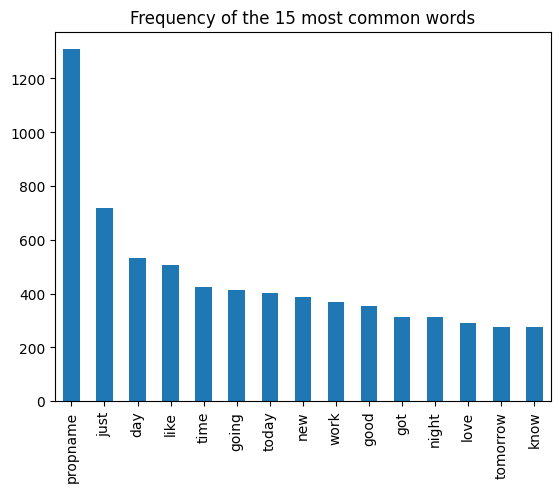

In [48]:
# Plot frequency of the 15 most common words
words.sum().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Frequency of the 15 most common words');

propname seems to be the most common non-stopword, but what could it be? This will be investigated in the next few code/markdown cells.

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [49]:
# Create the output as required by the question
propname_sentence = [' '.join(sentence) for sentence in X.apply(lambda x: x.split()) for word in sentence if word.lower() == '*propname*']
propname_sentence[:10]

['saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party.',
 'has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.',
 'Mondays are the new thursdays- anthony bourdain + *PROPNAME* = forgetting your financial troubles',
 'ATTENTION EVERYONE!!! Vote for the short "AFTER HOURS" to support *PROPNAME* - our local Michigan talent and a wonderful person. Repost please!!! http:////www.thirteen.org//sites//reel13//category//vote//',
 'would love to sleep, but *PROPNAME* writes too damn well!!!',
 "stupid people are stupid and Beverly Hills Police is at it's best as usual... ( *PROPNAME* needs to call me!!!)",
 'Nicel little test for *PROPNAME*!! Way to show them *PROPNAME* how to play PRO football!!',
 'The best way to describe *PROPNAME* is as an IRL troll.',
 "Fuckin' *PROPNAME*",
 '"Necessity is the plea for every infringement of human freedom. It is the argument of ty

#### Provide a short explanation of what you believe `propname` to be:

Hint: The attached PDF also contains an explanation.

Refers to the proper name of a person, has been edited for privacy (probably). Seems like people enjoy referencing the proper name of other people.

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

In [50]:
# Create the output as required by the question
text_and_scores = pd.concat([df, words],axis=1)

#### Show the 25 most common words for statuses from high-cAGR users:

In [51]:
# Create column names for words only
col_names = words.columns

In [52]:
# Create the output as required by the question
text_and_scores.loc[text_and_scores['cAGR'] == 'y', col_names].sum().sort_values(ascending=False).head(25)

propname    699
just        402
day         297
like        280
time        221
today       219
work        206
good        201
going       200
new         194
love        172
happy       165
night       161
know        157
got         157
people      156
tomorrow    153
life        140
home        131
tonight     129
really      127
don         119
want        108
weekend     105
ll          103
dtype: int64

#### Show the 25 most common words for statuses from low-cAGR users:

In [53]:
# Create the output as required by the question
text_and_scores.loc[text_and_scores['cAGR'] == 'n', col_names].sum().sort_values(ascending=False).head(25)

propname    610
just        315
day         237
like        226
going       214
time        203
new         192
today       183
work        163
got         157
good        153
night       151
home        136
don         134
tonight     127
tomorrow    124
life        120
love        120
really      119
know        119
people      112
think       110
want        109
happy       107
week         98
dtype: int64

### (BONUS) Most common bigrams:

This is a bonus section and not required.

Find the 10 most common bigrams in the dataset.

In [54]:
# Create the output as required by the question
X_bigrams = df['STATUS']
cv_bigrams = CountVectorizer(stop_words = 'english', ngram_range=(2,2))
cv_bigrams.fit(X_bigrams)
X_cv_bigrams = cv_bigrams.transform(X_bigrams)
words_bigrams = pd.DataFrame(X_cv_bigrams.todense(), columns=cv_bigrams.get_feature_names_out())
words_bigrams.sum().sort_values(ascending=False).head(10)

propname propname    147
just got              55
new year              53
http www              46
merry christmas       44
looking forward       43
feel like             39
happy new             32
don know              31
birthday wishes       29
dtype: int64

### (BONUS) Most common trigrams:

This is a bonus section and not required.

Find the 10 most common trigrams in the dataset.

In [55]:
# Create the output as required by the question
X_trigrams = df['STATUS']
cv_trigrams = CountVectorizer(stop_words = 'english', ngram_range=(3,3))
cv_trigrams.fit(X_trigrams)
X_cv_trigrams = cv_trigrams.transform(X_trigrams)
words_trigrams = pd.DataFrame(X_cv_trigrams.todense(), columns=cv_trigrams.get_feature_names_out())
words_trigrams.sum().sort_values(ascending=False).head(10)

propname propname propname    54
gainesville film industry     23
www examiner com              23
http www examiner             23
24676 gainesville film        23
film industry examiner        23
happy new year                21
examiner com examiner         20
com examiner 24676            20
examiner 24676 gainesville    20
dtype: int64

Seems like 2 word and 3 word proper names are the most common 2 and 3 word engrams.

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names.
- Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

### Answer to 'Choose your own adventure'

Given that I have spent quite a bit of time on this lab and plotted quite a lot of visualizations and given my analysis on those visualizations. I will provide answers to some questions I have answered from my EDA.

1. Is average word count per status related to any personality category or personality metric?

I have previously mentioned that the differences between traits and between classes for a trait are not very large, but here is the summary for the largest difference between traits. **The biggest difference between classes would be for openness, where those classified as 'open' used on average, 1.25 words and nearly 7 characters less than those classified as 'not open'.**

2. Which personality trait is the biggest predictor of the likelihood to post?

**This would be 'openness'.** I have previously analyzed this and also from the visualization of personality traits categorized by Y and N, the biggest difference in height of the bars (or counts or frequency) would be for openness. I have also calculated the difference between length of the dataframe (in other words, number of status posts) for the Y and N classes for each personality trait. The % of posts for those who classify as Y for openness is larger in magnitude than for the other 9 categories. This implies the biggest difference between the 2 classes of Y and N for personality and hence shows that open persons were more likely to post than those classified as 'not open'.

3. Is there evidence of some form of self-serving bias in the way that individuals rank themselves?

**Yes, most definitely.** I have brought up the Lake Wobegon effect and analyzed its manifestation mulitple times throughout the lab. Furthermore when we take a look at the summary statistics, we see that neuroticism has the lowest mean of 2.63, and openness has the highest mean of 4.08. The second lowest mean is extraversion with a value of 3.30. The smallest minimum value is for neuroticism with a value of 1.25, while openness has the largest minimum value of 2.25 and extraversion has the second smallest mimimum value of 1.33. The largest maximum value is 5 for all of the personality traits except for neuroticism, with the highest value for neuroticism being 4.75. This indicates that some sort of self-serving bias is evident in the sample. Individuals were more likely to rate themselves higher for positive traits and more likely to rate themselves lower for negative traits.

In [56]:
# Function to print out the % of posts for a given personality trait for the 2 different 'high' and 'low' categories
def post_percentage(df, trait, class_type, other_class_type):
    percentage_class_type = round(len(df[df[trait] == class_type]) * 100 / len(df), 2)
    print(f'The percentage for {class_type} is {percentage_class_type}% for {trait}')
    print(f'The percentage for {other_class_type} is {round(100 - percentage_class_type, 2)}% for {trait}') 

In [57]:
# Print out the % of posts for Y/N for all 5 personality traits
post_percentage(df, 'cEXT', 'y', 'n')
post_percentage(df, 'cNEU', 'y', 'n')
post_percentage(df, 'cAGR', 'y', 'n')
post_percentage(df, 'cCON', 'y', 'n')
post_percentage(df, 'cOPN', 'y', 'n')

The percentage for y is 42.45% for cEXT
The percentage for n is 57.55% for cEXT
The percentage for y is 37.48% for cNEU
The percentage for n is 62.52% for cNEU
The percentage for y is 53.12% for cAGR
The percentage for n is 46.88% for cAGR
The percentage for y is 45.95% for cCON
The percentage for n is 54.05% for cCON
The percentage for y is 74.31% for cOPN
The percentage for n is 25.69% for cOPN


---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as _explanatory_. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.

### Answer

I think I have 'explained' enough of the visuals in addition to 'exploring' them. If I spend more time on this lab, I might as well start approaching it in terms of a classification problem to predict whether a classifier can predict whether a post would be from a someone with 'Y' or 'N' for a given trait. That would be good practice, but I also need to do my project 3!